<a href="https://colab.research.google.com/github/ToAN7/SIC_AI/blob/main/sic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#install thư viện

In [ ]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=d4b5a19958a7acc14f6afe724eea1e7e0fd7b5dd1b5d8e6a7910ccc1bc4a5190
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
!pip install spicy

In [ ]:
!pip install spatial

  Preparing metadata (setup.py) ... done
  Created wheel for spatial: filename=spatial-0.2.0-py3-none-any.whl size=8484 sha256=888be6f7269a8f2fe1188b275b324938dbd5188b303b3d35e18e64b3d8f52027
  Stored in directory: /root/.cache/pip/wheels/b3/a9/45/5776d9357e179ab80f60dfbf7d002d095f1a7c5d8f86104bd3
Successfully built spatial


#import các thư viện

In [ ]:
from sklearn.svm import SVR# mô hình chạy thử
import pandas as pd# lấy dữ liệu
import numpy as np # tính toán
import matplotlib.pyplot as plt # vẽ đồ thị
from sentence_transformers import SentenceTransformer # Doc2Vec với dữ liệu dùng để kiểm thử
from sklearn.cluster import KMeans # Clustering
from sklearn.model_selection import train_test_split # Chia dữ liệu
from sklearn.model_selection import cross_val_score, KFold # đánh giá mô hình
from sklearn.metrics import accuracy_score # đánh giá mô hình
import re # tiền xử lý
import string # tiền xử lý
from sklearn.decomposition import PCA # giảm chiều dữ liệu
from scipy.spatial.distance import pdist, squareform # Tìm tâm cụm
from sklearn.metrics.pairwise import euclidean_distances #tính khoảng cách đầu vào và so sánh với tâm cụm
from sklearn.svm import OneClassSVM # Phân loại
from sklearn.feature_extraction.text import TfidfVectorizer # Tính tfidf


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/752 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
vietnamese_stop_words = [
              'là', 'và', 'có', 'trên', 'cho', 'một', 'các', 'được', 'như', 'với',
              'của', 'ở', 'khi', 'đã', 'còn', 'thì', 'này', 'bởi', 'đó', 'để', 'năm',
              'ngày', 'vào', 'sau', 'tại', 'trong', 'rằng', 'đến', 'từ'
              ]

#Hàm

In [ ]:
#Hàm tính độ đo cosine
def cosine_similarity(x_vec,y_vec,size):
  cosine_similarities = []
  for i in range(size):
    cos_sim = (x_vec[i] * y_vec.T).toarray().squeeze()
    cosine_similarities.append(cos_sim)
  return cosine_similarities

In [ ]:
#Hàm làm sạch dữ liệu <nên dùng trước khi vector hoá dữ liệu>
def convertData(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub("\\W"," ",text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+',b'',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text = re.sub('\w*\d\w*','',text)
  text = re.sub(' +', ' ',text)
  text = text.strip()
  text = ' '.join([word for word in text.split() if word not in vietnamese_stop_words])
  return text

#Lấy dữ liệu ra từ drive

In [ ]:
#data: Dữ liệu đã được embeddings có shape (8943,768)
data = pd.read_csv('/content/drive/MyDrive/SIC/Embeddings_DATA.csv')
#đọc file thật và giả
real_news = pd.read_csv('/content/drive/MyDrive/Data_/DATA_.csv')
fake_news = pd.read_csv('/content/drive/MyDrive/Data_/Fake_news_all.csv')

In [ ]:
# data.drop(columns=['Unnamed: 0'],inplace=True)
# real_news.drop(columns=['Unnamed: 0'],inplace=True)
# fake_news.drop(columns=['Unnamed: 0'],inplace=True)

#Tiếp cận 1 xác định độ tương đồng
1. tin giả ~ 304 dòng
2. tin thật ~ 8943 dòng

In [ ]:
#chuyển nội dung thành danh sách
X_real = real_news['Content'].tolist()
X_fake = fake_news['Content'].tolist()
#Tiền xử lý dữ liệu
X_Fake = [convertData(news) for news in X_fake]
X_Real = [convertData(news) for news in X_real]

In [ ]:
#Trích xuất tfidf vector
vectorizer = TfidfVectorizer(max_features=36512)
#Gộp 2 tập dữ liệu để tạo vecto cùng chiều
News = X_Fake + X_Real
#Tạo vectơ
News_vector = vectorizer.fit_transform(News)

In [ ]:
News_vector.shape

(9247, 33358)

In [ ]:
#Chia lại vecto cho từng tập sau khi đã tạo
fake_vectors = News_vector[:len(X_Fake)]
real_vectors = News_vector[len(X_Fake):]

In [ ]:
cosine_similarities = cosine_similarity(fake_vectors[:],real_vectors[:],len(X_Fake))
#Độ đo cosine của tin giả đầu tiên
print(f'Độ đo cosine của tin giả đầu tiên{cosine_similarities[0]}')

Độ đo cosine của tin giả đầu tiên  (0, 8666)	0.06485087314658608
  (0, 8462)	0.06341868209858109
  (0, 8461)	0.05906785693219378
  (0, 8327)	0.09172632846713517
  (0, 6935)	0.00964389499531851
  (0, 6845)	0.03476372779826364
  (0, 5577)	0.04396714580448127
  (0, 1685)	0.09325024103165262
  (0, 1684)	0.11682838498017642
  (0, 1677)	0.05674040238221419
  (0, 640)	0.009621237393257605
  (0, 8833)	0.010042094458226222
  (0, 8804)	0.00695803705258899
  (0, 8791)	0.009007903245552973
  (0, 8784)	0.007858649079836686
  (0, 8728)	0.02095722177533912
  (0, 8630)	0.01340441981020353
  (0, 8585)	0.018691405839324403
  (0, 8571)	0.01826567365693386
  (0, 8554)	0.008647804952680922
  (0, 8492)	0.00936381154826969
  (0, 8463)	0.009045473960159508
  (0, 8458)	0.010616726268056162
  (0, 8431)	0.01216411328885928
  (0, 8318)	0.018166442709521686
  :	:
  (0, 51)	0.08449613551882719
  (0, 49)	0.027683052769374807
  (0, 46)	0.029563603644327578
  (0, 45)	0.03152786247067888
  (0, 44)	0.05764940931800844
 

In [ ]:
#=>Mỗi giá trị của mảng là 1 độ đo cosin của tin giả đó ứng với 1 tin trong tập tin thật
#Tìm ra phần tử có độ đo cosin lớn nhất ở mỗi tin giả => Độ chính xác của tin
ketqua = list()
for i in range (len(cosine_similarities)):
  print(cosine_similarities[i].max())
  ketqua.append(cosine_similarities[i].max())

0.5643615484128375
0.38237215891900866
0.42152242546280705
0.41027705188001046
0.6262306983050778
0.3285363111835272
0.27893542773455493
0.3927097631876174
0.36519019275275727
0.3657067747828149
0.34503277102665614
0.33365629564493715
0.271317139523756
0.4423543093047033
0.4054443102650501
0.39925550985396174
0.35678801192167275
0.3779396348705058
0.5435435844851997
0.3495384136169266
0.31491737754952204
0.33526451946927033
0.31655502333509516
0.25837360237339196
0.4686937317072828
0.5813855780831212
0.4292931377608883
0.4744473161361525
0.6037394555114319
0.3395928575888511
0.5648812340252936
0.3806790501600141
0.32168332712919795
0.367227663594312
0.4866612764276954
0.25913548599827546
0.4676275584597875
0.2516087222113357
0.2705448342257158
0.5748716826496986
0.32266821989582084
0.26469428818388396
0.750296214983279
0.2997167734760445
0.559909425316391
0.5119864107041153
0.4993434487455705
0.4469640157089761
0.36172574460960266
0.43132118248882656
0.24221631416720263
0.3239187867886

In [ ]:
list_fake = list()

In [ ]:
#Độ tương đồng < 50 là ở mức có khả năng là tin giả và ngược lại
num = 0
for idx,kq in enumerate(ketqua):
  if kq < 0.5:
    list_fake.append(idx)
print(len(list_fake)/len(fake_news)) # số lượng tin có khả năng là giả / số lượng tin giả

0.680921052631579


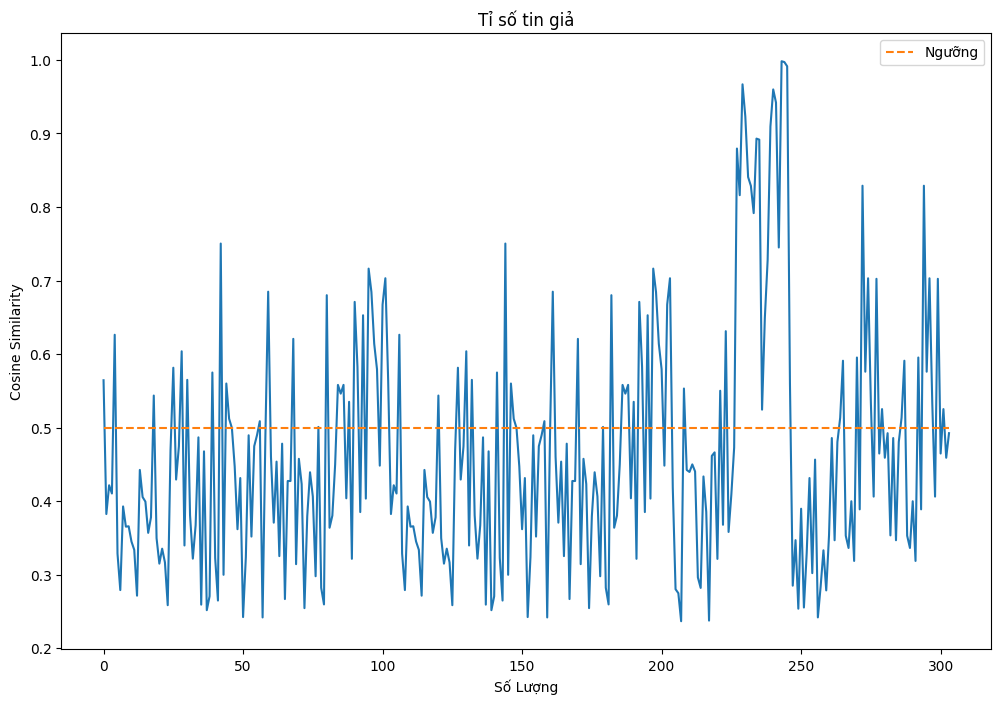

In [ ]:
#Trực quan hoá kết quả
plt.figure(figsize=(12, 8))
plt.plot(ketqua)
plt.plot([0.5] * len(ketqua), '--', label='Ngưỡng')
plt.xlabel('Số Lượng')
plt.ylabel('Cosine Similarity')
plt.title('Tỉ số tin giả')
plt.legend()
plt.show()

#Tiếp cận 2: Kmeans

In [ ]:
#Giảm chiều dữ liệu để trực quan hoá dữ liệu cho thoải mái hơn
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [ ]:
model_Kmeans = KMeans(n_clusters=4, random_state=42)

In [ ]:
model_Kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [ ]:
def caculate_thresholds(model, data, cluster_numb):
  ans = []
  if cluster_numb > model.n_clusters | cluster_numb == None:
    return None
  for i in range(model_Kmeans.n_clusters):
    cluster_ = data[model_Kmeans.labels_ == i]
    distance = model_Kmeans.transform(cluster_)
    min_distance = distance.min(axis=1)
    max_distance = distance.max(axis=1)
    threshold = max_distance.sum()/len(max_distance) - min_distance.sum()/(len(min_distance))
    ans.append(threshold)
  return ans


In [ ]:
centroids = model_Kmeans.cluster_centers_

In [ ]:
# với 4 cụm ta tìm x giữa 2 cụm xa nhau theo trục x và 2 cụm theo trục y
cs1 = centroids[0]
cs2 = centroids[1]
cs3 = centroids[2]
cs4 = centroids[3]
centroid_x = (cs1 + cs2)/2
centroid_y = (cs3 + cs4)/2
centroid = np.array([centroid_x,centroid_y])


In [ ]:
print(cs1)
print(cs2)
print(cs3)
print(cs4)

[ 1.60627065 -0.12864173]
[-1.26601113  0.06118566]
[ 0.03779476 -0.64919771]
[0.28417635 1.53338531]


In [ ]:
# centroid# tâm cụm có x là [0,0], y là [1,1]

In [ ]:
list_test = list()

In [ ]:
for i in range(model_Kmeans.n_clusters):
  ths = caculate_thresholds(model_Kmeans, data, model_Kmeans.n_clusters)

In [ ]:
text = input()
list_test.append(text)# nhằm lưu lại các text đã dùng
propress_text = convertData(text)
ebd_text = model.encode(propress_text)
ebd_text = pca.transform(ebd_text.reshape(1,-1))
  #Ta có toạ độ text mới, và toạ độ tâm centroid
tammoi = np.array([centroid[0][0],centroid[1][1]])
tammoi = tammoi.reshape(1,-1)
  #tính khoảng cách giữa 2 tâm
# dst_y =np.sqrt((tammoi[0][0]-ebd_text[0][0])**2 + (tammoi[0][1]-ebd_text[0][1])**2)
# tm = np.array([0,dst_y+centroid[1][1]]).reshape(1,-1)
# dst_x = np.sqrt((0-ebd_text[0][0])**2 + (dst_y-ebd_text[0][1])**2)
toadox = ebd_text[0][0]-centroid[0][0]
toadoy = ebd_text[0][1]-centroid[1][1]
print(f'2 cạnh góc vuông theo trục x, y {toadox,toadoy}')
canhhuyen = np.sqrt(toadox**2 + toadoy**2)
if canhhuyen > ths[0]:
  print('Có khả năng là tin không có thật')
else:
  print('Có khả năng là tin thật')
print(f'Toạ độ của văn bản: {ebd_text[0][0]}:{ebd_text[0][1]}')
print(f'Khoảng cách tìm được so với tâm: {canhhuyen}')


Trường đại học mở phá sản
2 cạnh góc vuông theo trục x, y (-0.18830730078863703, 1.8891385443425874)
Có khả năng là tin thật
Toạ độ của văn bản: -0.0181775410806703:2.3312323453589
Khoảng cách tìm được so với tâm: 1.8985004817621545


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
data.shape

(8943, 2)

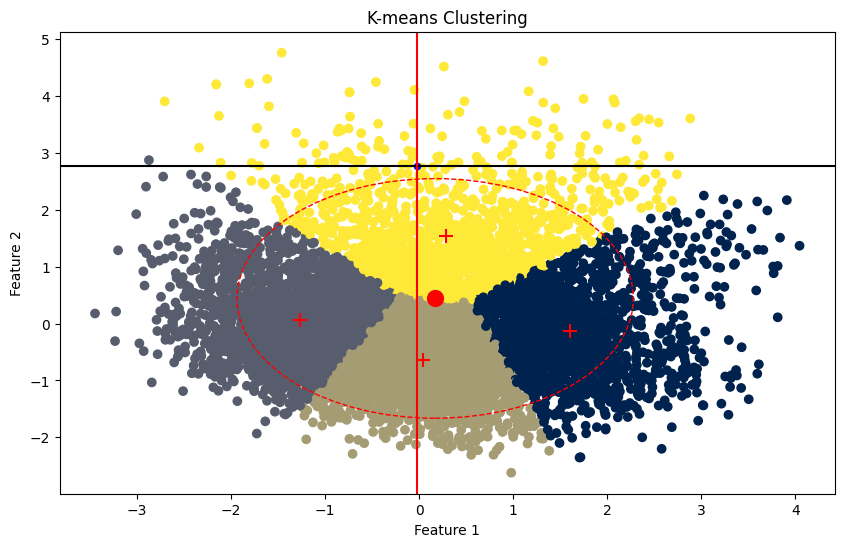

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(data[:,0], data[:, 1], c=model_Kmeans.labels_, cmap='cividis')
plt.scatter(centroids[:,0],centroids[:,1],marker='+',color='red',s=100)# s là kích thước của tất cả các điểm centroids, đặt 100 để chúng trở nên nổi bật hơn
plt.scatter(centroid[0][0],centroid[1][1],marker='o',color='red',s=130)
plt.scatter(ebd_text[0][0],ebd_text[0][1]+centroid[1][1],marker='o',color='blue',s=20)
#
#tìm ra ngưỡng thích hợp làm ngưỡng chung
circle = plt.Circle((centroid [0][0],centroid[1][1]), radius=ths[0], color='red', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# circle = plt.Circle((centroids[1,0], centroids[1,1]), radius=ths[1], color='blue', fill=False, linestyle='--')
# plt.gca().add_patch(circle)
# circle = plt.Circle((centroids[2,0], centroids[2,1]), radius=ths[2], color='brown', fill=False, linestyle='--')
# plt.gca().add_patch(circle)
# circle = plt.Circle((centroids[3,0], centroids[3,1]), radius=ths[3], color='gray', fill=False, linestyle='--')
# plt.gca().add_patch(circle)

##Vẽ đồ thị để hình dung cách tính khoảng cách

# plt.axvline(x=centroid[0][0], color='r', linestyle='-')
# plt.axhline(y=centroid[1][1],color='blue')

plt.axhline(y=ebd_text[0][1]+centroid[1][1],color='black')
plt.axvline(x=ebd_text[0][0], color='r', linestyle='-')

# plt.axvline(x=0, color='gray', linestyle='--')
# plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

#Tiếp cận 3: SVM.SVR

In [ ]:
model_svmSvr = SVR(kernel='rbf', C=100, epsilon=0.1)

In [ ]:
real_news.drop(columns=['Date','Source'],inplace=True)

In [ ]:
numb = 0
dulieu_gia = list()
for id in range(len(fake_news)):
  if id == list_fake[numb]:
    dulieu_gia.append(fake_news['Content'][id])
    numb += 1

In [ ]:
dulieu_gia = pd.DataFrame(dulieu_gia)

In [ ]:
dulieu_gia.columns = ['Content']
# real_news = real_news['Content'][:414]

In [ ]:
# real_news.columns

Index(['Content'], dtype='object')

In [ ]:
dulieu = pd.concat([dulieu_gia,real_news],ignore_index=True)

In [ ]:
dulieu.drop(columns=['Date','Source'],inplace=True)

In [ ]:
dudoan_f = np.ones(len(dulieu_gia))

In [ ]:
dudoan_t = np.zeros(len(real_news))

In [ ]:
pred = np.concatenate((dudoan_f,dudoan_t),axis=0)# nhãn với 1 là tin giả, 0 là tin thật

In [ ]:
dulieu.tail()

,Content
9145,"Thời tiết TP.HCM hôm nay 29/7,mây gián đoạn, t..."
9146,"Để phát triển kinh tế, Bình Định cho khai thác..."
9147,Phụ huynh và thí sinh có thể tham khảo điểm ch...
9148,"Câu chuyện ""tam giác tình yêu"" kỳ lạ ở Nhật Bả..."
9149,Bạn thân của chồng tôi muốn sinh con cho người...


In [ ]:
# dulieu_ = model.encode(dulieu['Content'])

In [ ]:
dulieu_ = vectorizer.fit_transform(dulieu['Content'])

In [ ]:
dulieu_.shape

(9150, 36512)

In [ ]:
print(dulieu_.shape)

(9150, 36512)


In [ ]:
model_svmSvr.fit(dulieu_,pred)

SVR(C=100)

In [ ]:
vectorizer.fit(dulieu['Content'])

In [ ]:
# text = "Thủ tướng thúc tiến độ loạt dự án trọng điểm vùng Đông Nam bộ"
text = "Philippines cáo buộc không quân Trung Quốc quấy rối máy bay trên bãi cạn Scarborough"
text = convertData(text)
tfIdf_text = vectorizer.transform([text])#dưới 0.5 là chính xác
# ebd_text = model.encode([text])
print(model_svmSvr.predict(tfIdf_text))

[0.11558559]
